<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/goturn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Author: Hughes Perreault

GOTURN visual object tracker with OpenCV.


Install required packages.

In [1]:
!pip uninstall -y opencv-python
!pip install opencv-contrib-python==3.4.11.41

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 54.6MB 72kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Import libraries.

In [2]:
import cv2
import sys
import os 
from google.colab.patches import cv2_imshow

Download video for tracking.

In [3]:
video_name = 'dancer.mp4'
if not os.path.exists(video_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/videos/dancer.mp4

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/videos/dancer.mp4
To: /content/dancer.mp4
100% 17.3M/17.3M [00:00<00:00, 26.0MB/s]


Download the model weights and the model specification, then unzip them.

In [4]:
file_name = 'goturn.caffemodel.zip.001'
if not os.path.exists(file_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.001
file_name = 'goturn.caffemodel.zip.002'
if not os.path.exists(file_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.002
file_name = 'goturn.caffemodel.zip.003'
if not os.path.exists(file_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.003
file_name = 'goturn.caffemodel.zip.004'
if not os.path.exists(file_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.004
file_name = 'goturn.prototxt'
if not os.path.exists(file_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.prototxt

if not os.path.exists('goturn.caffemodel.zip'):
  !cat goturn.caffemodel.zip* > goturn.caffemodel.zip
if not os.path.exists('goturn.caffemodel'):
  !unzip goturn.caffemodel.zip

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.001
To: /content/goturn.caffemodel.zip.001
100% 99.6M/99.6M [00:01<00:00, 85.3MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.002
To: /content/goturn.caffemodel.zip.002
100% 99.6M/99.6M [00:01<00:00, 85.4MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.003
To: /content/goturn.caffemodel.zip.003
100% 99.6M/99.6M [00:01<00:00, 85.3MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.caffemodel.zip.004
To: /content/goturn.caffemodel.zip.004
100% 61.0M/61.0M [00:00<00:00, 108MB/s] 
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/goturn-files/goturn.prototxt
To: /content/goturn.prototxt
7.96kB [00:00, 6.90MB/s]     
Archive:  goturn.caffemodel.zip

Read the video.

In [5]:
# Read video
video = cv2.VideoCapture(video_name)

Read first frame of video, then downscale to 25% for speed and memory.  

In [6]:
ok, frame = video.read()
scale = 0.25
height, width, depth = frame.shape
frame = cv2.resize(frame, (int(width*scale), int(height*scale)))

if not ok:
    print('Cannot read video file')
    sys.exit()

Define an initial bounding box to track, then display it on the frame.

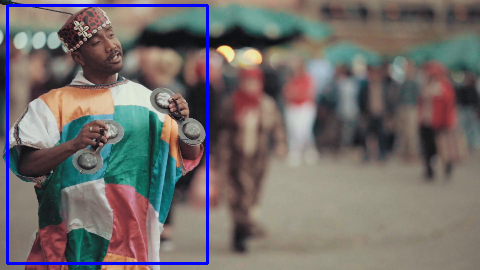

In [7]:
bbox = (30, 23, 800, 1035)
bbox = tuple([int(item * scale) for item in bbox])
 
p1 = (int(bbox[0]), int(bbox[1]))
p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
cv2_imshow(frame)

Create the tracker, then initialize it with the frame and bounding box.

In [8]:
tracker = cv2.TrackerGOTURN_create()
ok = tracker.init(frame, bbox)

As long as we can read frames from the video, update the tracker with the new frame and display the result.

In [9]:
for i in range(20):
    ok, frame = video.read()
    frame = cv2.resize(frame, (int(width*scale), int(height*scale)))

    if not ok:
        break

    ok, bbox = tracker.update(frame)

    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

    cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.